Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

## Data

The National Poll on Healthy Aging dataset was created to gather insights on the health, healthcare, and health policy issues affecting Americans aged 50 and older. By focusing on the perspectives of older adults and their caregivers, the University of Michigan aimed to inform the public, healthcare providers, policymakers, and advocates about the various aspects of aging. This includes topics like health insurance, household composition, sleep issues, dental care, prescription medications, and caregiving, thereby providing a comprehensive understanding of the health-related needs and concerns of the older population.



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Datasets/doctor-visits/NPHA-doctor-visits.csv")
df.dropna(inplace=True)
df.describe()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000
mean,2.112045,2.0,2.794118,1.988796,3.009804,2.806723,0.247899,0.056022,0.218487,0.504202,0.417367,2.407563,2.829132,1.425770,1.55042
std,0.683441,0.0,0.900939,0.939928,1.361117,0.586582,0.432096,0.230126,0.413510,0.500333,0.493470,0.670349,0.546767,1.003896,0.49780
min,1.000000,2.0,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.00000
25%,2.000000,2.0,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.00000
50%,2.000000,2.0,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.00000
75%,3.000000,2.0,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.00000
max,3.000000,2.0,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.00000


In [20]:
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


## Data Exploration

**TASK: Create a correlation heatmap.**

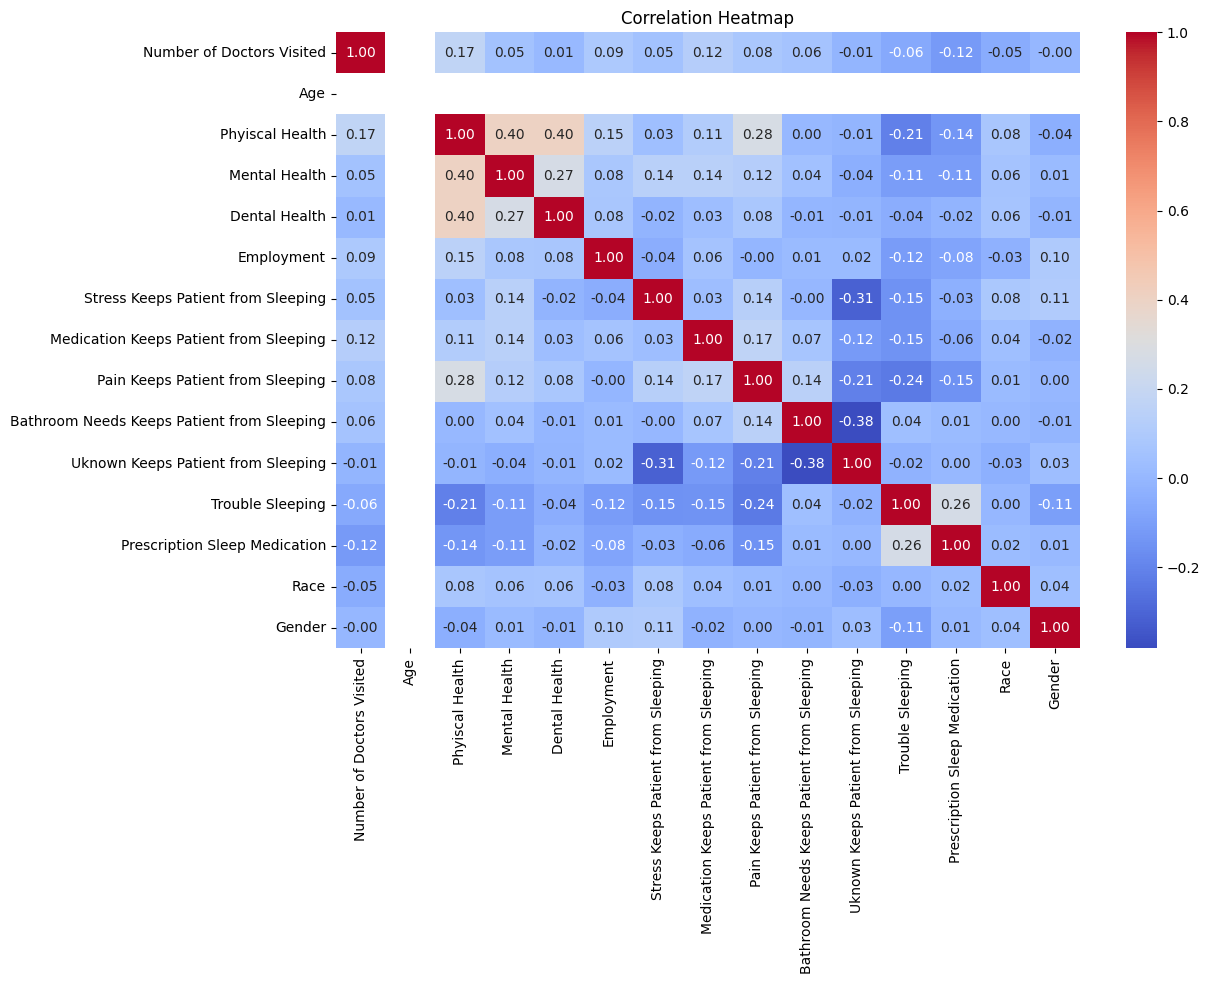

In [17]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Display the top 5 correlated frequencies

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [22]:
target_label = "Number of Doctors Visited"

# Select all columns except the target label
selected_features = df.columns[df.columns != target_label]

# Calculate correlation with the target label
correlation_values = {}
for feature in selected_features:
    # Exclude rows where Age is 0 when calculating correlation
    non_zero_age_df = df[df['Age'] != 0]
    # Check for zero standard deviation
    if non_zero_age_df[feature].std() == 0:
        correlation = 0  # Assign correlation as 0 if standard deviation is 0
    else:
        correlation = abs(non_zero_age_df[target_label].corr(non_zero_age_df[feature]))
    correlation_values[feature] = correlation

# Sort the correlation values in descending order
sorted_correlation_values = sorted(correlation_values.items(), key=lambda x: x[1], reverse=True)
print(sorted_correlation_values)
# Select the top 5 correlated frequencies with the target label
top_5_correlated = sorted_correlation_values[:5]

# Print the top 5 correlated frequencies with the target label
print("Top 5 correlated frequencies with the target label:")
for feature, correlation in top_5_correlated:
    print(f"{feature}: {correlation}")

[('Phyiscal Health', 0.16962854575524774), ('Prescription Sleep Medication', 0.12134452513177454), ('Medication Keeps Patient from Sleeping', 0.12054866417968495), ('Employment', 0.09257772770296707), ('Pain Keeps Patient from Sleeping', 0.08198990782671499), ('Trouble Sleeping', 0.06307858740837052), ('Bathroom Needs Keeps Patient from Sleeping', 0.0560433313890378), ('Stress Keeps Patient from Sleeping', 0.05304048520198261), ('Mental Health', 0.04998977466111116), ('Race', 0.04918648717352283), ('Uknown Keeps Patient from Sleeping', 0.014095016920881236), ('Dental Health', 0.009371370269102893), ('Gender', 0.00013856944683049343), ('Age', 0)]
Top 5 correlated frequencies with the target label:
Phyiscal Health: 0.16962854575524774
Prescription Sleep Medication: 0.12134452513177454
Medication Keeps Patient from Sleeping: 0.12054866417968495
Employment: 0.09257772770296707
Pain Keeps Patient from Sleeping: 0.08198990782671499


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [23]:
from sklearn.model_selection import train_test_split

# Assuming df contains your dataset with features and labels
# Separate features (X) and labels (y)
X = df.drop(columns=[target_label])  # Features
y = df[target_label]  # Labels

# Split the data into training and test sets (90% training, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Check the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (642, 14) (642,)
Test set shape: (72, 14) (72,)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('knn', KNeighborsClassifier())  # Step 2: KNN model
])


**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Various values of k
    # Add more hyperparameters for KNN if needed
}

# Perform grid search with cross-validation using the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best performing parameters
best_params = grid_search.best_params_

# Print the best performing parameters
print("Best performing parameters:", best_params)

Best performing parameters: {'knn__n_neighbors': 9}


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

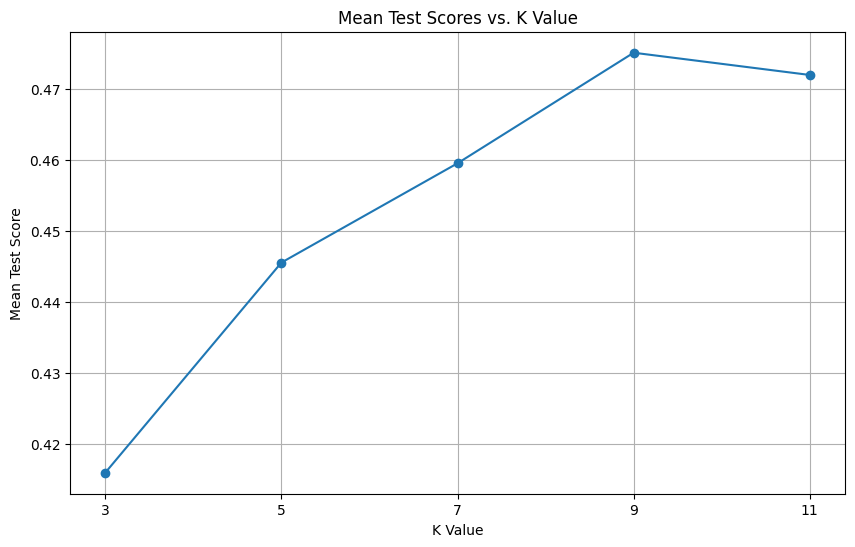

In [27]:
import matplotlib.pyplot as plt

# Extract mean test scores and corresponding K values from cv_results_
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = param_grid['knn__n_neighbors']

# Plot mean test scores against K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Test Scores vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Test Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.12      0.07      0.09        15
           2       0.56      0.76      0.65        41
           3       0.33      0.19      0.24        16

    accuracy                           0.49        72
   macro avg       0.34      0.34      0.32        72
weighted avg       0.42      0.49      0.44        72

Confusion Matrix:
[[ 1 12  2]
 [ 6 31  4]
 [ 1 12  3]]
